## _Medical Insurance Costs_

Pada kasus ini, terdapat data tentang informasi kesehatan dan biaya yang harus dikeluarkan oleh asuransi kesehatan. 
Infomasi terkait dengan data _medical insurance cost_ adalah sebagai berikut,

1. Age: Usia penerima manfaat
2. Sex: Gender penerima manfaat (_male_, _female_)
3. Bmi : Body Mass Index
4. Children: Jumlah anak/tanggungan yang dicover oleh pihak asuransi
5. Smoker: Status perokok (_yes_, _no_)
6. Region: Wilayah tempat tinggal penerima manfaat
7. Charges: Biaya yang dikeluarkan oleh asuransi

In [ ]:
# Selayang pandang data Medical Insurance Costs
import pandas as pd

df = pd.read_csv('data/insurance.csv')

display(df.head())

display(df.corr())

### Tantangan

Buatlah model regresi untuk memprediksi biaya yang harus dikeluarkan oleh pihak asuransi berdasarkan data. 
Validasi performa model regresi Anda dengan nilai ***R-squared ($R^2$)***

#### _Tasks_

1. Pastikan semua variabel kategorial diolah dengan baik. (Gunakan fitur mapping pada pandas)
2. Cek kondisi multicollinearity untuk semua variabel independen. Jika ada, antar variabel apakah itu?
3. Pastikan model menggunakan variabel yang tidak memiliki nilai multicollinearity yang tinggi
4. (Hints) Anda dapat menggunakan nilai ***Variance Inflation Factor (VIF)*** untuk mengetahui tingkat multicollinearity pada sebuah variabel independent.
5. Evaluasi model yang Anda buat dengan nilai $R^2$
6. Simpulkan, variabel independen apa saja yang dapat digunakan untuk menghasilkan model regresi yang baik pada kasus _medical insurance costs_?

#### (Hints) Interpretasi Nilai VIF

- 1 - variabel indenpenden tidak memiliki korelasi dengan variabel independen yang lain
- 1 < VIF < 5 - variabel independen sedikit memiliki korelasi dengan variabel independen yang lain
- VIF > 5 - variabel independen memiliki korelasi yang kuat dengan variabel independen lainnya
- VIF > 10 - variabel independen miliki korelasi yang sangat kuat dengan variabel independen dan perlu diperhatikan lebih lanjut

#### (Hints) Implementasi Perhitungan VIF

VIF dapat dihitung secara langsung dengan menggunakan library dari `statsmodels`

#### (Hints) Scatterplot Korelasi Antar Variabel

![var_cor](assets/var_corr.png)

## Mulai Mengerjakan!

Memastikan semua variabel kategorial diolah dengan baik. (Menggunakan fitur mapping pada pandas)

Variabel kategorial pada data yaitu ada variabel 'sex', 'smoker', dan 'region'


In [55]:
from sklearn.preprocessing import OneHotEncoder

oe_sex = [
    [ 'male' ],
    [ 'female' ]
]

oe_sex = OneHotEncoder().fit_transform(oe_sex)

oe_sex = oe_sex.toarray()

In [56]:
oe_smoker = [
    [ 'yes' ],
    [ 'no' ]
]

oe_smoker = OneHotEncoder().fit_transform(oe_smoker)

oe_smoker = oe_smoker.toarray()

In [57]:
oe_region = [
    [ 'southwest' ],
    [ 'northwest' ]
]

oe_region = OneHotEncoder().fit_transform(oe_region)

oe_region = oe_region.toarray()

In [58]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

c:\Users\Radit\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Radit\anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
c:\Users\Radit\anaconda3\lib\site-packages\seaborn\axisgrid.py:1416: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if x_var == y_var:
c:\Users\Radit\anaconda3\lib\site-packages\seaborn\axisgrid.py:1394: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if x_var != y_var:
c:\Users\Radit\anaconda3\lib\site-packages\seaborn\axisgrid.py:1557: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future w

TypeError: unhashable type: 'numpy.ndarray'

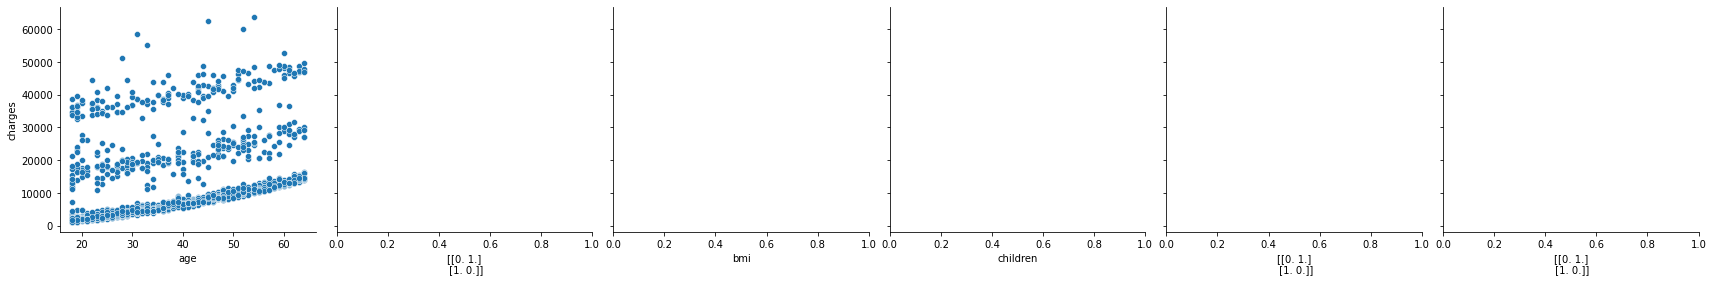

In [59]:
# operasi visualisasi
sns.pairplot(df, x_vars=['age', oe_sex,'bmi', 'children', oe_smoker, oe_region], 
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

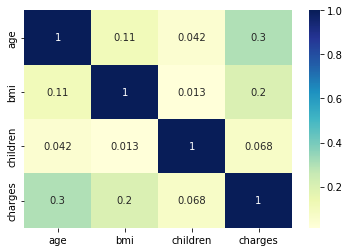

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

Dari bentuk visualisasi di atas terlihat bahwa Age memiliki korelasi yang paling kuat terhadap Charges


### Regresi Linier

In [ ]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = df['age']
y = df['charges']

In [ ]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [ ]:
# hasil training dtaset
X_train
y_train

966     23967.38305
522      9866.30485
155      6948.70080
671      3943.59540
1173     6457.84340
           ...     
802      2103.08000
53      37742.57570
350     11830.60720
79       6571.02435
792      2731.91220
Name: charges, Length: 936, dtype: float64

In [ ]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [ ]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    2707.051837
age       267.740141
dtype: float64

In [ ]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     99.76
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           2.18e-22
Time:                        08:18:06   Log-Likelihood:                -10082.
No. Observations:                 936   AIC:                         2.017e+04
Df Residuals:                     934   BIC:                         2.018e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2707.0518   1113.327      2.431      0.015     522.139    4891.965
age          267.7401     26.806      9.988      0.000     215.133     320.348
==============================================================================
Omnibus:                      284.664   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.549
Skew:                           1.743   Prob(JB):                    5.88e-134
Kurtosis:                       4.891   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

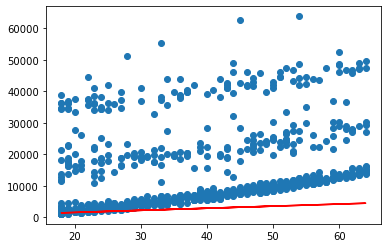

In [ ]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()